# Mmke_code_runnable and make CannonicalCode

File content successfully read and assigned to CannonicalCode.

# Define Axes
Axes = [3]


#WMX3 python library
from WMX3ApiPython import *
from time import *

INFINITE = int(0xFFFFFFFF)

def main():
    Wmx3Lib = WMX3Api()
    CmStatus = CoreMotionStatus()
    Wmx3Lib_cm = CoreMotion(Wmx3Lib)
    print('Program begin.')
    sleep(0.1)

    # Create devices. 
    ret = Wmx3Lib.CreateDevice('C:\\Program Files\\SoftServo\\WMX3', DeviceType.DeviceTypeNormal, INFINITE)
    if ret!=0:
        print('CreateDevice error code is ' + str(ret) + ': ' + Wmx3Lib.ErrorToString(ret))
        return

    # Set Device Name.
    Wmx3Lib.SetDeviceName('WMX3initTest')

    # Start Communication.
    ret = Wmx3Lib.StartCommunication(INFINITE)
    if ret!=0:
        print('StartCommunication error code is ' + str(ret) + ': ' + Wmx3Lib.ErrorToString(ret))
        return

    # Import and set all the preset motion parameters.
    ret=Wmx3Lib_cm.config.ImportAndSetAll("C:\\Program Files\\SoftServo\\WMX3\\wmx_

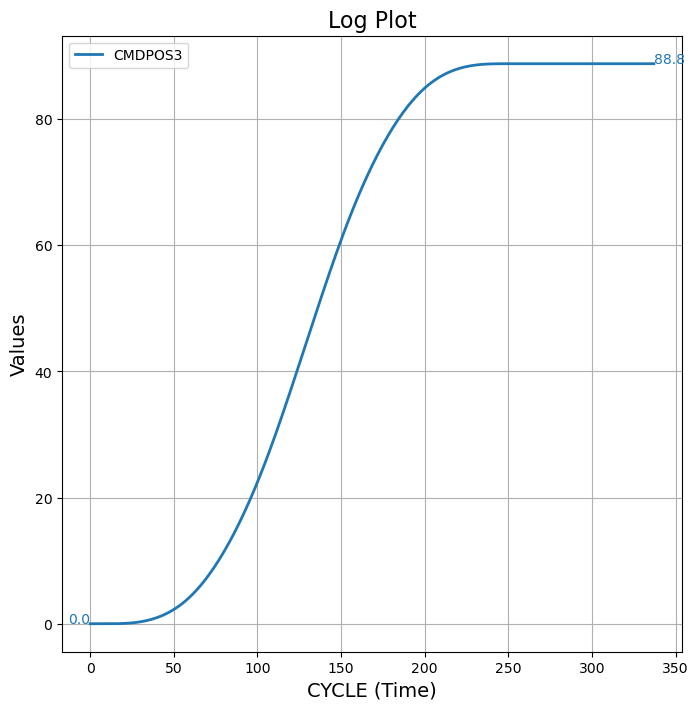

In [3]:
from CodeClient import *
from make_code_runnable import *
from plot_log import *

import os

def MakeCannonicalCode():
# TaskId文件路径
    file_path = r'/Users/yin/Documents/GitHub/MCCodeLog/TaskId.txt'
    with open(file_path, 'r', encoding='utf-8') as file:
            task_info = file.read().strip()  # 读取文件内容并去除首尾空白字符

    # Only for making CanonicalCode.
    llm_name = 'CanonicalCode'

    folder_path = r'/Users/yin/Documents/GitHub/MCCodeLog'
    os.makedirs(folder_path, exist_ok=True)

    code_file_path = os.path.join(folder_path, f"{task_info}_{llm_name}.py")

    try:
        with open(code_file_path, 'r', encoding='utf-8') as file:
            CannonicalCode = file.read()
            print("File content successfully read and assigned to CannonicalCode.")
    except FileNotFoundError:
        print(f"File not found: {code_file_path}")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")

    # Get python code from the output of LLM
    msgCode = CannonicalCode
    RunnableCode = make_code_runnable(msgCode, llm_name, task_info)
    print(RunnableCode)

    # Run Code in WMX3
    SendCode(RunnableCode)
    

    folder_path = r'/Users/yin/Documents/GitHub/MCCodeLog'
    os.makedirs(folder_path, exist_ok=True)

    log_file_path = os.path.join(folder_path, f"{task_info}_{llm_name}_log.txt")
    plot_log(log_file_path)



MakeCannonicalCode()   
    